# Principe

Sur un tableau de n éléments (numérotés de 0 à N-1), le tri par sélection 

* recherche le plus petit élément du tableau, et l'échange avec l'élément d'indice 0 
* recherche le second plus petit élément du tableau, et l'échange avec l'élément d'indice 1 
* continue jusqu'à l'indice N-2 jusqu'à ce que le tableau soit entièrement trié.

Nous allons l'illustrer en triant le tableau TAB ci-dessous. Vous pouvez en changer le contenu et en visualiser l'effet en relançant "Cell / Run All" dans le menu ci-dessus.

In [1]:
TAB = [ 5, 8, 4, 3, 2, 1, 7, 6 ]
print(TAB)

[5, 8, 4, 3, 2, 1, 7, 6]


# Recherche de l'indice du plus petit élément à partir d'une position donnée p

Le coeur de l'algorithme consiste à trouver l'indice de l'élément le plus dans la partie du tableau pas encore triée. Ecrivons cette fonction

In [2]:
def plus_petit_element(T,p):
    N = len(T)
    plusPetit = p
    for i in range(p+1,N):
        if T[i] < T[plusPetit]:
            plusPetit = i
    return plusPetit

Testons la sur notre tableau en cherchant depuis le début (position 0)

In [3]:
T = TAB.copy()
print(T)
iMin = plus_petit_element(T,0)
print("Le plus petit élément est",T[iMin],", à l'indice",iMin)

[5, 8, 4, 3, 2, 1, 7, 6]
Le plus petit élément est 1 , à l'indice 5


# Echange avec le premier élément du tableau

Une fois le plus petit élément trouvé, on le place en tête de tableau (ou de la partie du tableau qui reste à trier). Comme il faut bien conserver la valeur qui était en tête en non l'écraser, le plus simple consiste à échanger les éléments en tête et minimum. 

In [4]:
T[iMin],T[0] = T[0],T[iMin]   # swap
print(T)

[1, 8, 4, 3, 2, 5, 7, 6]


Le premier élément est donc en place mais le reste du tableau, d'indices 1 à N-1, reste à trier. Répétons l'opération pour l'indice 1

In [5]:
iMin = plus_petit_element(T,1)
T[iMin],T[1] = T[1],T[iMin]   # swap
print(T)

[1, 2, 4, 3, 8, 5, 7, 6]


# Boucle externe

Il faut répéter ce processus pour toutes les positions de 0 à N-2. Il n'est pas nécessaire de le faire pour l'indice N-1, un tableau de 1 élément étant toujours trié. 

In [6]:
T = TAB.copy()
print(T)
N = len(T)

for i in range(0,N-1):
    iMin = plus_petit_element(T,i)
    T[iMin],T[i] = T[i],T[iMin]   # swap
    print(T)

[5, 8, 4, 3, 2, 1, 7, 6]
[1, 8, 4, 3, 2, 5, 7, 6]
[1, 2, 4, 3, 8, 5, 7, 6]
[1, 2, 3, 4, 8, 5, 7, 6]
[1, 2, 3, 4, 8, 5, 7, 6]
[1, 2, 3, 4, 5, 8, 7, 6]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


# En résumé

Le tri par sélection effectue deux boucles imbiquées. La boucle interne recherche l'élément le plus petit dans la partie du tableau par encore trié. La boucle externe échange cet élément avec celui en tête de la partie du tableau non trié. 

In [7]:
def tri_par_selection(T):
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            if T[j] < T[jMin]:
                jMin = j
        T[jMin],T[i] = T[i],T[jMin]

In [8]:
T = TAB.copy()
tri_par_selection(T)
print(T)

[1, 2, 3, 4, 5, 6, 7, 8]


# Complexité

Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'échanges. 

In [9]:
def tri_par_selection_cnt(T):
    nb_comparaisons = nb_echanges = 0
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            nb_comparaisons += 1
            if T[j] < T[jMin]:
                jMin = j
        nb_echanges += 1        
        T[jMin],T[i] = T[i],T[jMin]
    return nb_comparaisons, nb_echanges

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

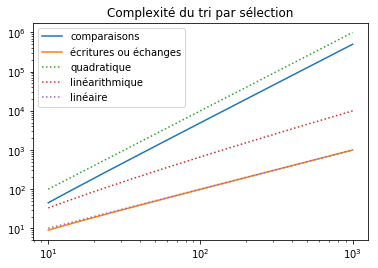

    N |     Comp. |      Ech.
-------------------------------
   10 |        45 |         9
   19 |       171 |        18
   37 |       666 |        36
   71 |      2485 |        70
  138 |      9453 |       137
  268 |     35778 |       267
  517 |    133386 |       516
 1000 |    499500 |       999


In [11]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_par_selection_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri par sélection")

Nous voyons que le nombre de comparaisons a une complexité quadratique en $\Theta(n^2)$ pour trier $n$ éléments. Pour être plus précis, il y a exactement $n(n-1)/2$ comparaisons, comme pour le tri à bulles. Par contre, le nombre d'échanges évolue avec une complexité linéaire $\Theta(n)$, et plus précisément il y a $n-1$ échanges.

A la lecture de l'algorithme, ces nombres de comparaisons et d'échanges sont évidemment indépendants du contenu du tableau à trier. Il n'est dès lors par nécessaire d'effectuer d'autres tests.

# Stabilité

Le tri par sélection n'est malheureusement pas stable. En effet, l'échange `T[jMin],T[i] = T[i],T[jMin]` déplace l'élément précédemment en position `i` à un endroit arbitraire du tableau sans tenir compte de sa valeur. Rien ne l'empêche donc de passer à droite d'un autre élément de valeur égale, ce qui brise la stabilité. 

Pour l'illuster, il faut réécrire le tri avec une fonction de comparaison générique. 


Le tri n'est pas stable


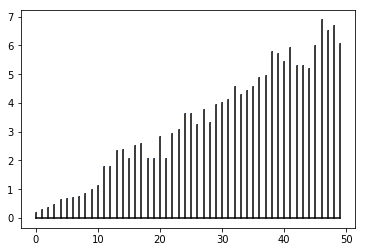

In [12]:
def tri_par_selection_generique(T,plus_petit):
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            if plus_petit(T[j],T[jMin]):
                jMin = j
        T[jMin],T[i] = T[i],T[jMin]
        
hlp.test_stabilite(tri_par_selection_generique)

# Visualisation

Finalement, visualisons graphiquement le tri de 20 entiers aléatoires entre 0 et 100

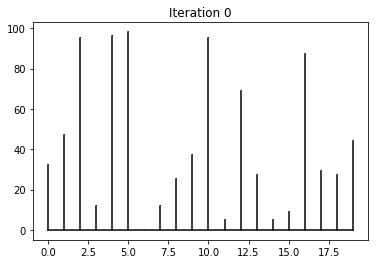

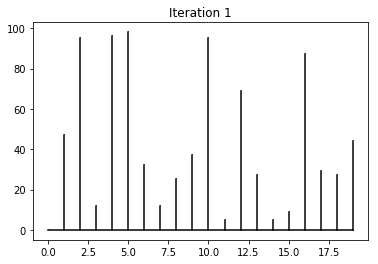

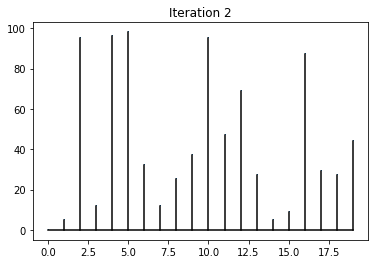

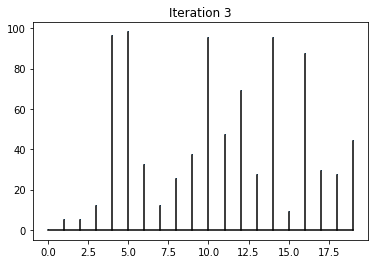

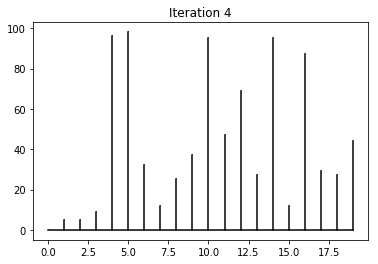

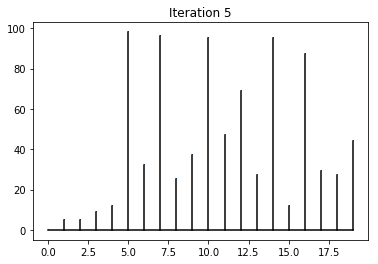

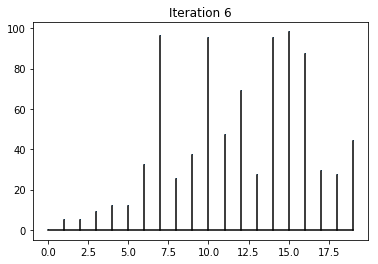

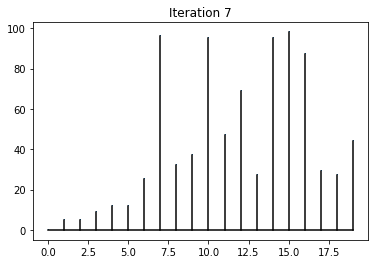

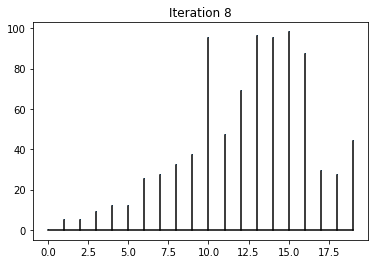

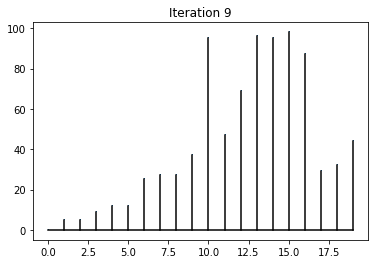

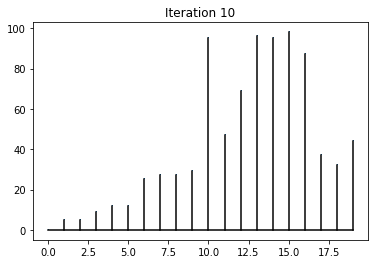

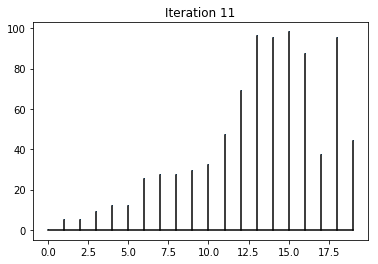

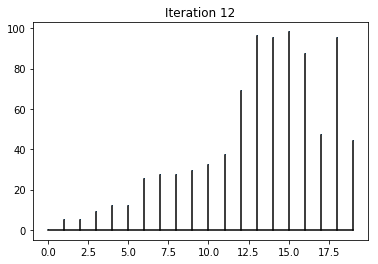

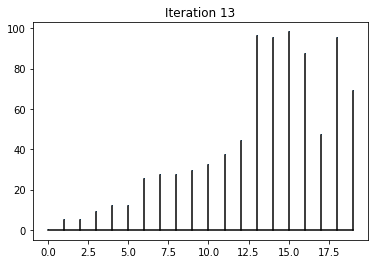

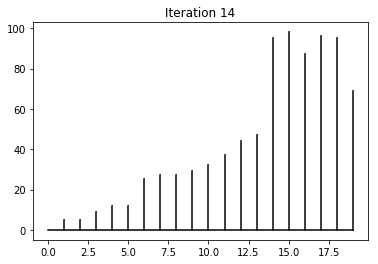

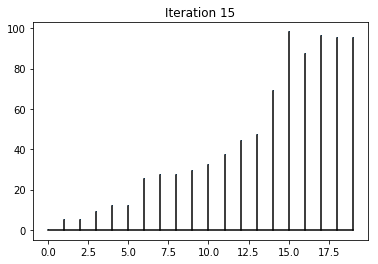

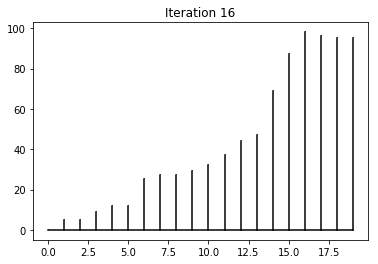

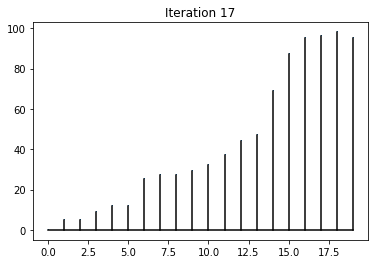

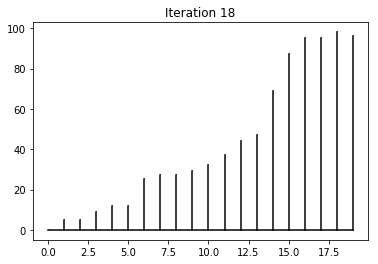

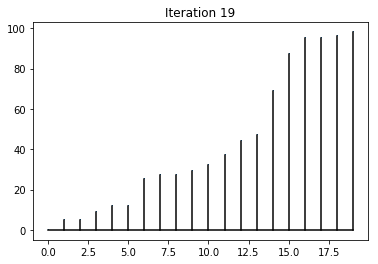

In [13]:
hlp.visualisation_tri_par_selection()